# DATA 607 - Machine Learning

## Class 9 &mdash; 2025.03.24 &mdash; More deep learning. Time series.

### Fine-tuning deep learning models with PyTorch

[Cats and Dogs &mdash; Colab notebook](https://colab.research.google.com/drive/18p5x_boWvoUnWf89R-40-oz_JVlB5k-o?usp=sharing)

[Modern Bert/Huggingface](https://colab.research.google.com/drive/1mI5BhPThUcVrl8iJSsJ6KwVko07jzGtG)

In [5]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from pathlib import Path

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv",
    parse_dates=["Month"],
    index_col="Month",
)
df.index.name = "Date"
df["logPassengers"] = np.log(df["Passengers"])
df

,Passengers,logPassengers
Date,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791
...,...,...
1960-08-01,606,6.406880
1960-09-01,508,6.230481
1960-10-01,461,6.133398


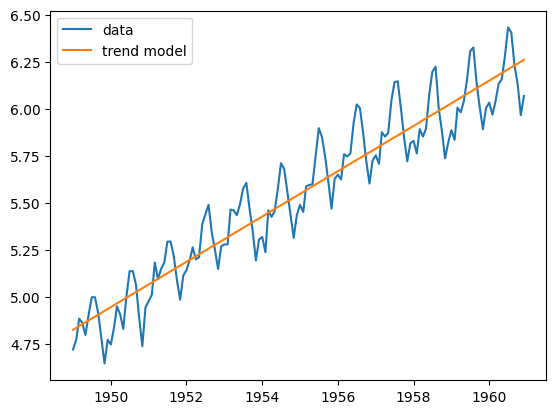

In [14]:
trend_model = LinearRegression()
X = np.arange(len(df)).reshape(-1, 1)
y = df["logPassengers"]
trend_model.fit(X, y)
df["Trend"] = trend_model.predict(X)
plt.plot(df["logPassengers"], label="data")
plt.plot(df["Trend"], label="trend model")
plt.legend()
plt.show()

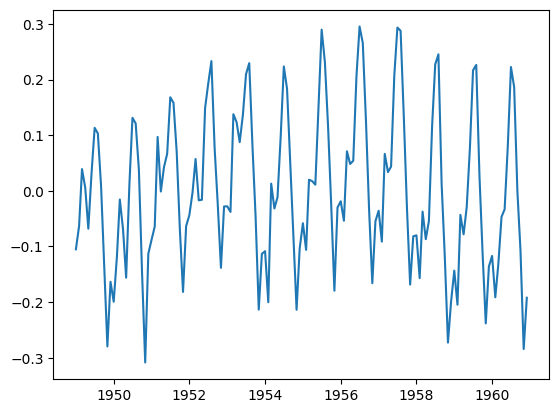

In [15]:
df["Detrended"] = df["logPassengers"] - df["Trend"]
plt.plot(df["Detrended"])

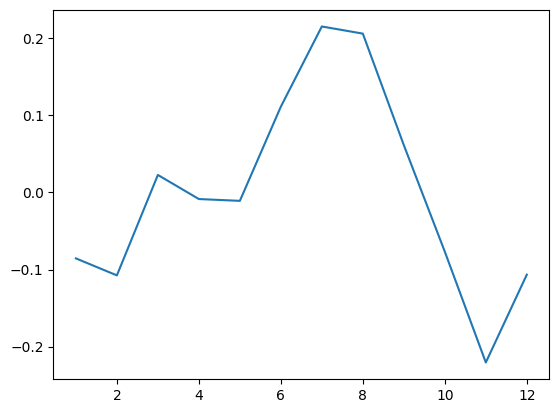

In [19]:
df["Month"] = df.index.month
means = df.groupby("Month")["Detrended"].mean()
plt.plot(means)

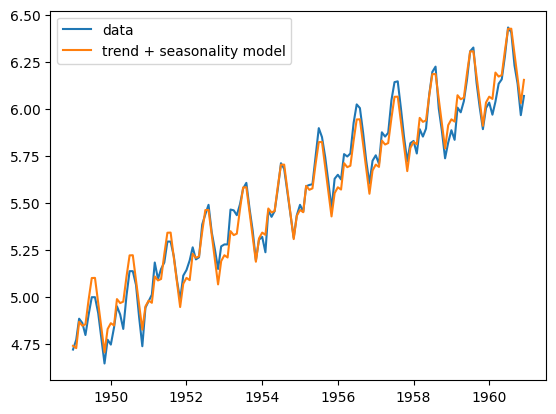

In [24]:
df["Seasonality"] = df["Month"].map(means)
plt.plot(df["logPassengers"], label="data")
plt.plot(df["Trend"] + df["Seasonality"], label="trend + seasonality model")
plt.legend()
plt.show()

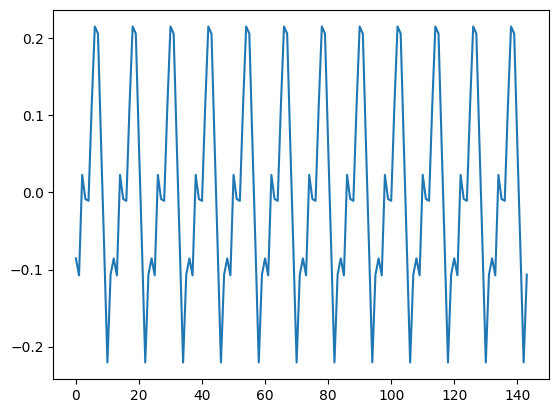

In [ ]:
X = pd.get_dummies(df["Month"], prefix="Month")
y = df["Detrended"]
seasonality_model = LinearRegression(fit_intercept=False)
seasonality_model.fit(X, y)
plt.plot(seasonality_model.predict(X))

In [ ]:
assert np.allclose(seasonality_model.predict(X), df["Seasonality"])